In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

path = 'data/predict.csv'

In [2]:
DATA = pd.read_csv(path)

In [3]:
DATA

,recency,topic_rank,diversity,authors_mean_rank,authors_mean_hindex,authors_mean_gindex,authors_mean_sociality,authors_mean_pagerank,authors_mean_productivity,journal_pagerank,journal_rank,title_len,abstract_len,n_authors,c5,log_authors_mean_sociality
0,16,1.0,-0.425436,500.0,1.0,1.0,6.0,NaN,NaN,NaN,101.0,66,1653,7,1.0,1.945910
1,8,7.0,-0.571967,134.0,1.0,1.0,6.0,NaN,NaN,NaN,24.0,59,1527,7,32.0,1.945910
2,15,19.0,-0.859644,235.0,1.0,1.0,5.0,NaN,NaN,NaN,49.0,169,1554,6,5.0,1.791759
3,6,4.0,-1.054999,1124.0,1.0,1.0,10.0,NaN,NaN,NaN,185.0,130,2121,11,7.0,2.397895
4,14,2.0,-0.476697,346.0,1.0,1.0,2.0,NaN,NaN,NaN,72.0,100,432,3,7.0,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,25,6.0,-0.330948,528.0,0.0,0.0,6.0,NaN,NaN,NaN,140.0,62,645,7,0.0,1.945910
475,6,12.0,-1.493480,2145.0,0.0,0.0,1.0,NaN,NaN,NaN,416.0,45,714,2,0.0,0.693147
476,24,17.0,-1.466320,551.0,0.0,0.0,4.0,NaN,NaN,NaN,146.0,84,0,5,0.0,1.609438
477,24,6.0,-1.556737,551.0,0.0,0.0,0.0,NaN,NaN,NaN,146.0,56,0,1,0.0,0.000000


In [4]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   recency                     479 non-null    int64  
 1   topic_rank                  479 non-null    float64
 2   diversity                   479 non-null    float64
 3   authors_mean_rank           473 non-null    float64
 4   authors_mean_hindex         473 non-null    float64
 5   authors_mean_gindex         473 non-null    float64
 6   authors_mean_sociality      473 non-null    float64
 7   authors_mean_pagerank       0 non-null      float64
 8   authors_mean_productivity   0 non-null      float64
 9   journal_pagerank            0 non-null      float64
 10  journal_rank                440 non-null    float64
 11  title_len                   479 non-null    int64  
 12  abstract_len                479 non-null    int64  
 13  n_authors                   479 non

In [5]:
# To  check the null values in the data
DATA.isnull().sum()

recency                         0
topic_rank                      0
diversity                       0
authors_mean_rank               6
authors_mean_hindex             6
authors_mean_gindex             6
authors_mean_sociality          6
authors_mean_pagerank         479
authors_mean_productivity     479
journal_pagerank              479
journal_rank                   39
title_len                       0
abstract_len                    0
n_authors                       0
c5                              0
log_authors_mean_sociality      6
dtype: int64

In [6]:
cols_to_drop = ['authors_mean_pagerank', 'authors_mean_productivity', 'journal_pagerank', 'authors_mean_sociality']

In [7]:
df = DATA.drop(cols_to_drop, axis=1)

In [8]:
df.head(3)

,recency,topic_rank,diversity,authors_mean_rank,authors_mean_hindex,authors_mean_gindex,journal_rank,title_len,abstract_len,n_authors,c5,log_authors_mean_sociality
0,16,1.0,-0.425436,500.0,1.0,1.0,101.0,66,1653,7,1.0,1.945910
1,8,7.0,-0.571967,134.0,1.0,1.0,24.0,59,1527,7,32.0,1.945910
2,15,19.0,-0.859644,235.0,1.0,1.0,49.0,169,1554,6,5.0,1.791759


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   recency                     479 non-null    int64  
 1   topic_rank                  479 non-null    float64
 2   diversity                   479 non-null    float64
 3   authors_mean_rank           473 non-null    float64
 4   authors_mean_hindex         473 non-null    float64
 5   authors_mean_gindex         473 non-null    float64
 6   journal_rank                440 non-null    float64
 7   title_len                   479 non-null    int64  
 8   abstract_len                479 non-null    int64  
 9   n_authors                   479 non-null    int64  
 10  c5                          479 non-null    float64
 11  log_authors_mean_sociality  473 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 45.0 KB


<AxesSubplot:>

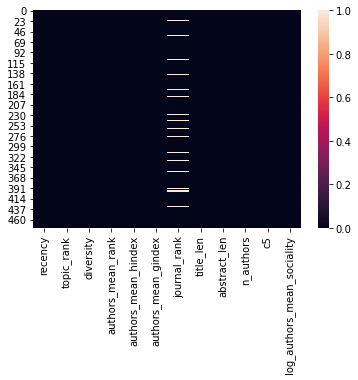

In [10]:
sb.heatmap(df.isnull())

In [11]:
df.describe()

,recency,topic_rank,diversity,authors_mean_rank,authors_mean_hindex,authors_mean_gindex,journal_rank,title_len,abstract_len,n_authors,c5,log_authors_mean_sociality
count,479.000000,479.000000,479.000000,473.000000,473.000000,473.000000,440.000000,479.000000,479.000000,479.000000,479.000000,473.000000
mean,13.419624,10.125261,-0.675481,741.769615,0.844051,0.844668,146.184091,94.983299,1162.283925,4.369520,6.713987,1.264066
std,5.860415,5.748655,0.606013,581.948922,0.363961,0.364351,111.398299,38.524238,657.597003,2.800775,12.547968,0.703466
min,5.000000,1.000000,-2.995732,1.000000,0.000000,0.000000,1.000000,16.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,5.000000,-1.087146,265.000000,1.000000,1.000000,53.750000,68.000000,758.500000,2.000000,0.000000,0.693147
50%,13.000000,10.000000,-0.526332,596.000000,1.000000,1.000000,122.000000,91.000000,1197.000000,4.000000,2.000000,1.386294
75%,18.000000,15.000000,-0.150066,1141.000000,1.000000,1.000000,216.750000,116.500000,1587.500000,6.000000,8.000000,1.791759
max,25.000000,20.000000,-0.056685,2336.000000,1.125000,1.166667,436.000000,279.000000,3655.000000,16.000000,154.000000,2.772589


In [12]:
# Replace missing values with the mean of the column
df.fillna(df.mean(), inplace = True)

<AxesSubplot:>

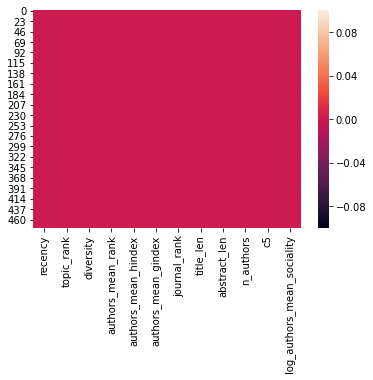

In [13]:
sb.heatmap(df.isnull())

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 478
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   recency                     479 non-null    int64  
 1   topic_rank                  479 non-null    float64
 2   diversity                   479 non-null    float64
 3   authors_mean_rank           479 non-null    float64
 4   authors_mean_hindex         479 non-null    float64
 5   authors_mean_gindex         479 non-null    float64
 6   journal_rank                479 non-null    float64
 7   title_len                   479 non-null    int64  
 8   abstract_len                479 non-null    int64  
 9   n_authors                   479 non-null    int64  
 10  c5                          479 non-null    float64
 11  log_authors_mean_sociality  479 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


array([[<AxesSubplot:title={'center':'recency'}>,
        <AxesSubplot:title={'center':'topic_rank'}>,
        <AxesSubplot:title={'center':'diversity'}>],
       [<AxesSubplot:title={'center':'authors_mean_rank'}>,
        <AxesSubplot:title={'center':'authors_mean_hindex'}>,
        <AxesSubplot:title={'center':'authors_mean_gindex'}>],
       [<AxesSubplot:title={'center':'journal_rank'}>,
        <AxesSubplot:title={'center':'title_len'}>,
        <AxesSubplot:title={'center':'abstract_len'}>],
       [<AxesSubplot:title={'center':'n_authors'}>,
        <AxesSubplot:title={'center':'c5'}>,
        <AxesSubplot:title={'center':'log_authors_mean_sociality'}>]],
      dtype=object)

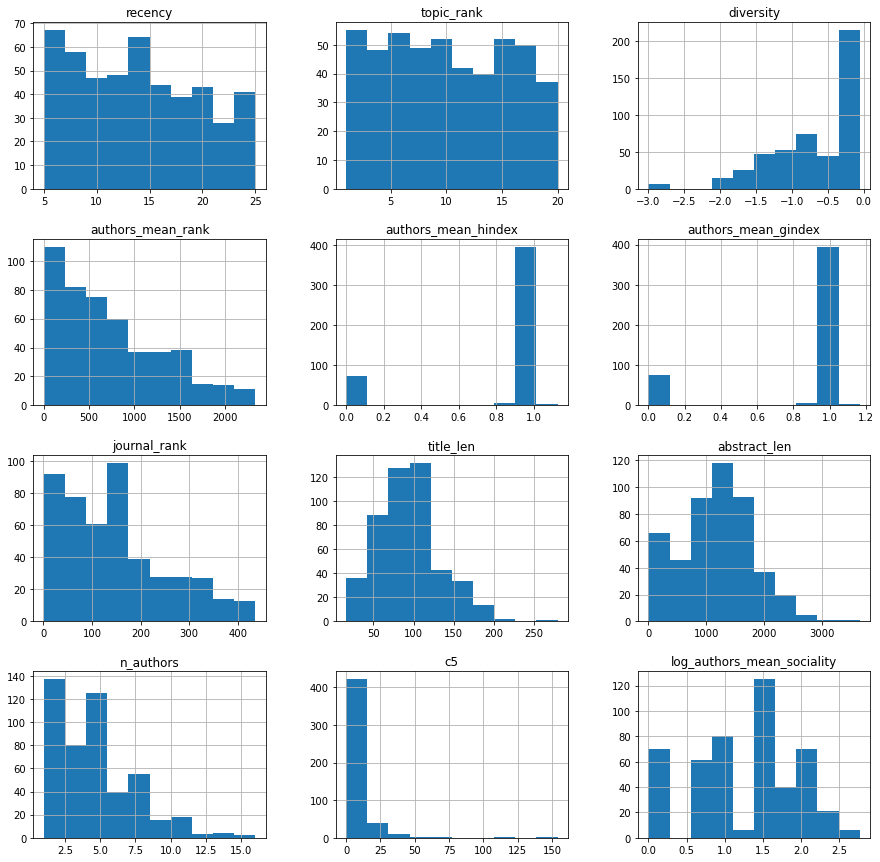

In [16]:
df.hist(figsize=(15, 15))

In [17]:
X = df.drop('c5', axis=1)
y = df['c5']

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

Linear Regression

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
r2_score(y_train, y_pred)

0.422811268461996

GradientBoostingRegressor

In [20]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_train)
r2_score(y_train, gbr.predict(X_train))

0.98953194808459

RandomForestRegressor

In [21]:
rsg = RandomForestRegressor()
rsg.fit(X_train,y_train)
y_pred = rsg.predict(X_test)
r2_score(y_test,y_pred)

0.6198154072286512